# Compile photoswitch results


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use(["science", "nature"])
from glob import glob
from fastcore.utils import load_pickle

from gpt3forchem.helpers import get_else_nan, mean_confidence_interval


## Classification


In [32]:
all_classification_data = glob("results/photoswitch_20220913_4epoch/*.pkl")


In [33]:
all_augmentation_res = glob("results/20220913_photoswitch_augment/*.pkl")


In [34]:
load_pickle(all_classification_data[0])


{'model_type': 'ada',
 'train_set_size': 10,
 'train_size': 10,
 'test_size': 380,
 'cm': pycm.ConfusionMatrix(classes: ['0', '1', '2', '3', '4']),
 'accuracy': 0.788421052631579,
 'completions': {'choices': [<OpenAIObject at 0x28f575d10> JSON: {
     "finish_reason": "length",
     "index": 0,
     "logprobs": null,
     "text": " 1@@@@@@ 0@@@@@@"
   },
   <OpenAIObject at 0x28f575e50> JSON: {
     "finish_reason": "length",
     "index": 1,
     "logprobs": null,
     "text": " 0@@@ 0@@@ 1@@@@@"
   },
   <OpenAIObject at 0x28f575c20> JSON: {
     "finish_reason": "length",
     "index": 2,
     "logprobs": null,
     "text": " 0@@@@@@@@@@@@@"
   },
   <OpenAIObject at 0x28f575090> JSON: {
     "finish_reason": "length",
     "index": 3,
     "logprobs": null,
     "text": " 1@@@@@@ 0@@@@@@"
   },
   <OpenAIObject at 0x28f575f90> JSON: {
     "finish_reason": "length",
     "index": 4,
     "logprobs": null,
     "text": " 0@@@ 0@@@ 1@@@ 0"
   },
   <OpenAIObject at 0x28f575bd0> JSON:

In [35]:
load_pickle(all_augmentation_res[0])


{'model_type': 'ada',
 'train_set_size': 70,
 'train_size': 70,
 'test_size': 18,
 'augmented_size_train': 770,
 'augmented_size_test': 198,
 'cm': pycm.ConfusionMatrix(classes: [0, 1, 2, 3]),
 'brier': 0.8945065629557608,
 'ece': 0.4331550802139037,
 'include_canonical': True,
 'subset_scores': {'canonical': pycm.ConfusionMatrix(classes: [0, 1, 2, 3]),
  'augmented': pycm.ConfusionMatrix(classes: [0, 1, 2, 3]),
  'brier_augmented': 0.9411764705882353,
  'ece_augmented': 0.47058823529411764},
 'accuracy': 0.7647058823529411,
 'completions': {'choices': [<OpenAIObject at 0x28f5ae6d0> JSON: {
     "finish_reason": "length",
     "index": 0,
     "logprobs": null,
     "text": " 0@@@@ 0@@@@@@@@"
   },
   <OpenAIObject at 0x28f5ae7c0> JSON: {
     "finish_reason": "length",
     "index": 1,
     "logprobs": null,
     "text": " 0@@@@ 0@@@@@@@@"
   },
   <OpenAIObject at 0x28f5ae8b0> JSON: {
     "finish_reason": "length",
     "index": 2,
     "logprobs": null,
     "text": " 0@@@@ 0@@@@@@

In [36]:
compiled_classification_data = []
compiled_baseline_data = []

compiled_augmentation_data = []
compiled_augmentation_baseline_data = []


for filename in all_classification_data:
    loaded_res = load_pickle(filename)

    res = {
        "accuracy": get_else_nan(loaded_res["cm"], "ACC_Macro"),
        "f1_macro": get_else_nan(loaded_res["cm"], "F1_Macro"),
        "f1_micro": get_else_nan(loaded_res["cm"], "F1_Micro"),
        "train_size": loaded_res["train_size"],
        "mcc": get_else_nan(loaded_res["cm"], "Overall_MCC"),
        "representation": loaded_res["representation"],
    }

    baseline_res = {
        "baseline_accuracy": get_else_nan(loaded_res["baseline"]["cm"], "ACC_Macro"),
        "baseline_f1_macro": get_else_nan(loaded_res["baseline"]["cm"], "F1_Macro"),
        "baseline_f1_micro": get_else_nan(loaded_res["baseline"]["cm"], "F1_Micro"),
        "baseline_mcc": get_else_nan(loaded_res["baseline"]["cm"], "Overall_MCC"),
        "train_size": loaded_res["train_size"],
        "representation": loaded_res["representation"],
    }

    compiled_classification_data.append(res)
    compiled_baseline_data.append(baseline_res)

for filename in all_augmentation_res:
    loaded_res = load_pickle(filename)

    res = {
        "accuracy": get_else_nan(loaded_res["cm"], "ACC_Macro"),
        "f1_macro": get_else_nan(loaded_res["cm"], "F1_Macro"),
        "f1_micro": get_else_nan(loaded_res["cm"], "F1_Micro"),
        "train_size": loaded_res["train_size"],
        "mcc": get_else_nan(loaded_res["cm"], "Overall_MCC"),
        "representation": loaded_res["representation"],
        "include_canonical": str(loaded_res["include_canonical"]),
    }

    baseline_res = {
        "baseline_accuracy": get_else_nan(loaded_res["baseline"]["cm"], "ACC_Macro"),
        "baseline_f1_macro": get_else_nan(loaded_res["baseline"]["cm"], "F1_Macro"),
        "baseline_f1_micro": get_else_nan(loaded_res["baseline"]["cm"], "F1_Micro"),
        "baseline_mcc": get_else_nan(loaded_res["baseline"]["cm"], "Overall_MCC"),
        "train_size": loaded_res["train_size"],
        "representation": loaded_res["representation"],
    }

    compiled_augmentation_data.append(res)
    compiled_augmentation_baseline_data.append(baseline_res)


In [37]:
compiled_classification_data = pd.DataFrame(compiled_classification_data)
compiled_baseline_data = pd.DataFrame(compiled_baseline_data)

compiled_augmentation_data = pd.DataFrame(compiled_augmentation_data)
compiled_augmentation_baseline_data = pd.DataFrame(compiled_augmentation_baseline_data)


In [38]:
compiled_classification_data


,accuracy,f1_macro,f1_micro,train_size,mcc,representation
0,0.788421,0.276516,0.471053,10,0.237251,selfies
1,0.742982,0.135367,0.228947,10,0.038584,SMILES
2,0.713684,0.118088,0.284211,10,-0.026914,SMILES
3,0.848421,0.503241,0.621053,200,0.467502,selfies
4,0.880000,0.665442,0.700000,300,0.577942,SMILES
...,...,...,...,...,...,...
159,0.920000,0.578358,0.800000,350,0.718222,SMILES
160,0.845768,0.064392,0.151724,100,0.072443,selfies
161,0.839286,0.381313,0.678571,60,0.547208,name
162,0.815294,0.321442,0.538235,50,0.362057,SMILES


In [39]:
compiled_baseline_data


,baseline_accuracy,baseline_f1_macro,baseline_f1_micro,baseline_mcc,train_size,representation
0,0.780475,0.286579,0.451187,0.231217,10,selfies
1,0.790526,0.327171,0.476316,0.264654,10,SMILES
2,0.718947,0.091684,0.297368,None,10,SMILES
3,0.909474,0.745468,0.773684,0.68806,200,selfies
4,0.915556,0.839339,0.788889,0.714279,300,SMILES
...,...,...,...,...,...,...
159,0.950000,0.833822,0.875000,0.830967,350,SMILES
160,0.851903,0.557248,0.629758,0.496439,100,selfies
161,0.821429,0.495652,0.642857,0.538764,60,name
162,0.840000,0.471378,0.600000,0.473489,50,SMILES


In [40]:
compiled_augmentation_data


,accuracy,f1_macro,f1_micro,train_size,mcc,representation,include_canonical
0,0.764706,0.173077,0.529412,70,None,name,True
1,0.915556,0.628692,0.788889,300,0.704539,SMILES,True
2,0.600000,0.000000,0.000000,40,None,name,False
3,0.740000,0.103704,0.350000,350,None,selfies,True
4,0.870000,0.517279,0.675000,350,0.552474,SMILES,True
...,...,...,...,...,...,...,...
242,0.750000,0.166667,0.500000,60,None,name,True
243,0.844706,0.541250,0.611765,50,0.453454,SMILES,True
244,0.703430,0.082180,0.258575,10,None,selfies,True
245,0.900000,0.794667,0.750000,350,0.649946,SMILES,False


In [41]:
compiled_classification_data_agg = compiled_classification_data.groupby(
    ["representation", "train_size"]
).agg(["mean", "std", mean_confidence_interval])


/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_8021/2975492776.py:1: FutureWarning: ['mcc'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  compiled_classification_data_agg = compiled_classification_data.groupby(


In [42]:
compiled_classification_data_agg

accuracy            \
                               mean       std   
representation train_size                       
SMILES         10          0.747544  0.032961   
               50          0.796076  0.025879   
               100         0.819263  0.039260   
               200         0.861340  0.017412   
               300         0.871914  0.047682   
               350         0.881389  0.074338   
name           10          0.822344  0.030679   
               40          0.822917  0.051384   
               60          0.834184  0.026715   
               70          0.837302  0.029696   
selfies        10          0.755975  0.038399   
               50          0.808251  0.046971   
               100         0.829453  0.009926   
               200         0.857076  0.013743   
               300         0.880988  0.011712   
               350         0.851587  0.061131   

                                                                              \
                                                    mean_confidence_interval   
representation train_size                                                      
SMILES         10          (0.7475438596491227, 0.7292905632446411, 0.765...   
               50          (0.7960764305722289, 0.7811342139705192, 0.811...   
               100         (0.8192634295097349, 0.7965955024539434, 0.841...   
               200         (0.8613397129186603, 0.8502766170925914, 0.872...   
               300         (0.8719135802469137, 0.8416180624579078, 0.902...   
               350         (0.8813888888888889, 0.8341566052464681, 0.928...   
name           10          (0.8223443223443222, 0.7939711695758606, 0.850...   
               40          (0.8229166666666667, 0.7753942110648281, 0.870...   
               60          (0.8341836734693878, 0.809476642560052, 0.8588...   
               70          (0.8373015873015872, 0.8098376514087887, 0.864...   
selfies        10          (0.7559750616209947, 0.7301785890842187, 0.781...   
               50          (0.8082513368983957, 0.7746502160699712, 0.841...   
               100         (0.8294531522117728, 0.821823609347494, 0.8370...   
               200         (0.8570760233918128, 0.8465125523329657, 0.867...   
               300         (0.8809876543209876, 0.8719849069623803, 0.889...   
               350         (0.8515873015873016, 0.8045980924116538, 0.898...   

                           f1_macro            \
                               mean       std   
representation train_size                       
SMILES         10          0.172224  0.068288   
               50          0.293982  0.099117   
               100         0.395013  0.137835   
               200         0.550441  0.182528   
               300         0.606681  0.121078   
               350         0.628614  0.232034   
name           10          0.337186  0.075558   
               40          0.364047  0.082537   
               60          0.424459  0.072896   
               70          0.422268  0.087622   
selfies        10          0.176363  0.065746   
               50          0.304819  0.101883   
               100         0.411530  0.136442   
               200         0.523656  0.041900   
               300         0.616966  0.109503   
               350         0.466945  0.195996   

                                                                              \
                                                    mean_confidence_interval   
representation train_size                                                      
SMILES         10          (0.17222422433795806, 0.13440747039120313, 0.2...   
               50          (0.2939819726271636, 0.2367538060887542, 0.351...   
               100         (0.39501295349087057, 0.3154294298071387, 0.47...   
               200         (0.5504410302849133, 0.4344683035269976, 0.666...   
               300         (0.6066814110699107, 0.5297518784169956, 0.683...   
  

In [43]:
compiled_baseline_data_agg = compiled_baseline_data.groupby(["train_size"]).agg(
    ["mean", "std", mean_confidence_interval]
)


/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_8021/3823612954.py:1: FutureWarning: ['baseline_mcc', 'representation'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  compiled_baseline_data_agg = compiled_baseline_data.groupby(["train_size"]).agg(


In [44]:
compiled_baseline_data_agg

baseline_accuracy            \
                        mean       std   
train_size                               
10                  0.748177  0.042967   
40                  0.812256  0.018204   
50                  0.832802  0.015213   
60                  0.818819  0.023901   
70                  0.857143  0.033750   
100                 0.861147  0.011859   
200                 0.900752  0.012689   
300                 0.913620  0.019304   
350                 0.922381  0.024475   

                                                               \
                                     mean_confidence_interval   
train_size                                                      
10          (0.7481774236502746, 0.7329419272119203, 0.763...   
40          (0.8122563433328928, 0.7954203710561505, 0.829...   
50          (0.8328022152813928, 0.826378466502137, 0.8392...   
60          (0.8188194081051225, 0.7967149524282284, 0.840...   
70          (0.8571428571428571, 0.8259296781578273, 0.888...   
100         (0.8611465893350901, 0.8560181751265213, 0.866...   
200         (0.900751879699248, 0.8949758742136419, 0.9065...   
300         (0.9136198799120145, 0.9048330059625461, 0.922...   
350         (0.9223809523809524, 0.9112398614269215, 0.933...   

           baseline_f1_macro            \
                        mean       std   
train_size                               
10                  0.256428  0.150878   
40                  0.580695  0.075754   
50                  0.485178  0.070456   
60                  0.581727  0.095273   
70                  0.695481  0.084769   
100                 0.615801  0.058509   
200                 0.727050  0.047482   
300                 0.773902  0.072770   
350                 0.807507  0.083498   

                                                               \
                                     mean_confidence_interval   
train_size                                                      
10          (0.2564284717536723, 0.2029294161025924, 0.309...   
40          (0.5806949778999468, 0.510633867044169, 0.6507...   
50          (0.48517791032708346, 0.4554270869006941, 0.51...   
60          (0.5817272722913023, 0.4936147235097759, 0.669...   
70          (0.6954813504349107, 0.6170827726215325, 0.773...   
100         (0.6158005254896853, 0.5904993215666265, 0.641...   
200         (0.7270498609386856, 0.7054361415497775, 0.748...   
300         (0.7739024644241299, 0.7407778308009196, 0.807...   
350         (0.8075074070138736, 0.7694994986940594, 0.845...   

           baseline_f1_micro            \
                        mean       std   
train_size                               
10                  0.399275  0.098174   
40                  0.624513  0.036408   
50                  0.582006  0.038032   
60                  0.637639  0.047801   
70                  0.714286  0.067499   
100                 0.652866  0.029649   
200                 0.751880  0.031723   
300                 0.784050  0.048259   
350                 0.805952  0.061189   

                                                               
                                     mean_confidence_interval  
train_size                                                     
10          (0.3992747279568554, 0.364463652734556, 0.4340...  
40          (0.6245126866657856, 0.5908407421123011, 0.658...  
50          (0.582005538203482, 0.5659461662553427, 0.5980...  
60          (0.6376388162102449, 0.5934299048564566, 0.681...  
70          (0.7142857142857143, 0.6518593563156546, 0.776...  
100         (0.6528664733377256, 0.6400454378163037, 0.665...  
200         (0.7518796992481204, 0.7374396855341053, 0.766...  
300         (0.7840496997800367, 0.7620825149063656, 0.806...  
350         (0.805952380952381, 0.7780996535673038, 0.8338...

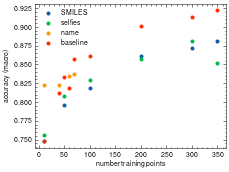

In [45]:
plt.scatter(
    compiled_classification_data_agg.loc["SMILES"].index,
    compiled_classification_data_agg.loc["SMILES"]["accuracy"]["mean"],
    label="SMILES",
)


plt.scatter(
    compiled_classification_data_agg.loc["selfies"].index,
    compiled_classification_data_agg.loc["selfies"]["accuracy"]["mean"],
    label="selfies",
)

plt.scatter(
    compiled_classification_data_agg.loc["name"].index,
    compiled_classification_data_agg.loc["name"]["accuracy"]["mean"],
    label="name",
)

plt.scatter(
    compiled_baseline_data_agg.index,
    compiled_baseline_data_agg["baseline_accuracy"]["mean"],
    label="baseline",
)

plt.legend()
plt.xlabel('number training points')
plt.ylabel('accuracy (macro)')
plt.tight_layout()
plt.savefig('photoswitch_classification_accuracy.pdf', bbox_inches='tight')

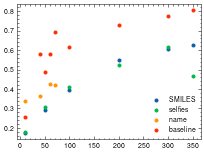

In [46]:
plt.scatter(
    compiled_classification_data_agg.loc["SMILES"].index,
    compiled_classification_data_agg.loc["SMILES"]["f1_macro"]["mean"],
    label="SMILES",
)


plt.scatter(
    compiled_classification_data_agg.loc["selfies"].index,
    compiled_classification_data_agg.loc["selfies"]["f1_macro"]["mean"],
    label="selfies",
)

plt.scatter(
    compiled_classification_data_agg.loc["name"].index,
    compiled_classification_data_agg.loc["name"]["f1_macro"]["mean"],
    label="name",
)

plt.scatter(
    compiled_baseline_data_agg.index,
    compiled_baseline_data_agg["baseline_f1_macro"]["mean"],
    label="baseline",
)

plt.legend()


In [47]:
compiled_augmentation_data_agg = compiled_augmentation_data.groupby(
    ["representation", "include_canonical", "train_size"]
).agg(["mean", "std", mean_confidence_interval, "count"])


/var/folders/m9/_txh68y946s4pxy1x2wnd3lh0000gn/T/ipykernel_8021/465716129.py:1: FutureWarning: ['mcc'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  compiled_augmentation_data_agg = compiled_augmentation_data.groupby(


In [48]:
compiled_augmentation_data_agg = compiled_augmentation_data_agg.loc['SMILES']


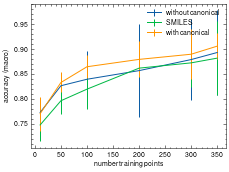

In [49]:


plt.errorbar(
    compiled_augmentation_data_agg.loc["False"].index,
    compiled_augmentation_data_agg.loc["False"]["accuracy"]["mean"],
    yerr=compiled_augmentation_data_agg.loc["False"]["accuracy"]["std"],
    label="without canonical",
)

plt.errorbar(
    compiled_classification_data_agg.loc["SMILES"].index,
    compiled_classification_data_agg.loc["SMILES"]["accuracy"]["mean"],
    yerr=compiled_classification_data_agg.loc["SMILES"]["accuracy"]["std"],
    label="SMILES",
)

plt.errorbar(
    compiled_augmentation_data_agg.loc["True"].index,
    compiled_augmentation_data_agg.loc["True"]["accuracy"]["mean"],
    yerr=compiled_augmentation_data_agg.loc["True"]["accuracy"]["std"],
    label="with canonical",
)
plt.legend()
plt.xlabel('number training points')
plt.ylabel('accuracy (macro)')
plt.tight_layout()
plt.savefig('photoswitch_classification_accuracy_augmentation.pdf', bbox_inches='tight')

In [50]:
compiled_classification_data_agg

accuracy            \
                               mean       std   
representation train_size                       
SMILES         10          0.747544  0.032961   
               50          0.796076  0.025879   
               100         0.819263  0.039260   
               200         0.861340  0.017412   
               300         0.871914  0.047682   
               350         0.881389  0.074338   
name           10          0.822344  0.030679   
               40          0.822917  0.051384   
               60          0.834184  0.026715   
               70          0.837302  0.029696   
selfies        10          0.755975  0.038399   
               50          0.808251  0.046971   
               100         0.829453  0.009926   
               200         0.857076  0.013743   
               300         0.880988  0.011712   
               350         0.851587  0.061131   

                                                                              \
                                                    mean_confidence_interval   
representation train_size                                                      
SMILES         10          (0.7475438596491227, 0.7292905632446411, 0.765...   
               50          (0.7960764305722289, 0.7811342139705192, 0.811...   
               100         (0.8192634295097349, 0.7965955024539434, 0.841...   
               200         (0.8613397129186603, 0.8502766170925914, 0.872...   
               300         (0.8719135802469137, 0.8416180624579078, 0.902...   
               350         (0.8813888888888889, 0.8341566052464681, 0.928...   
name           10          (0.8223443223443222, 0.7939711695758606, 0.850...   
               40          (0.8229166666666667, 0.7753942110648281, 0.870...   
               60          (0.8341836734693878, 0.809476642560052, 0.8588...   
               70          (0.8373015873015872, 0.8098376514087887, 0.864...   
selfies        10          (0.7559750616209947, 0.7301785890842187, 0.781...   
               50          (0.8082513368983957, 0.7746502160699712, 0.841...   
               100         (0.8294531522117728, 0.821823609347494, 0.8370...   
               200         (0.8570760233918128, 0.8465125523329657, 0.867...   
               300         (0.8809876543209876, 0.8719849069623803, 0.889...   
               350         (0.8515873015873016, 0.8045980924116538, 0.898...   

                           f1_macro            \
                               mean       std   
representation train_size                       
SMILES         10          0.172224  0.068288   
               50          0.293982  0.099117   
               100         0.395013  0.137835   
               200         0.550441  0.182528   
               300         0.606681  0.121078   
               350         0.628614  0.232034   
name           10          0.337186  0.075558   
               40          0.364047  0.082537   
               60          0.424459  0.072896   
               70          0.422268  0.087622   
selfies        10          0.176363  0.065746   
               50          0.304819  0.101883   
               100         0.411530  0.136442   
               200         0.523656  0.041900   
               300         0.616966  0.109503   
               350         0.466945  0.195996   

                                                                              \
                                                    mean_confidence_interval   
representation train_size                                                      
SMILES         10          (0.17222422433795806, 0.13440747039120313, 0.2...   
               50          (0.2939819726271636, 0.2367538060887542, 0.351...   
               100         (0.39501295349087057, 0.3154294298071387, 0.47...   
               200         (0.5504410302849133, 0.4344683035269976, 0.666...   
               300         (0.6066814110699107, 0.5297518784169956, 0.683...   
  

In [51]:
compiled_augmentation_data_agg

accuracy            \
                                  mean       std   
include_canonical train_size                       
False             10          0.772485  0.012592   
                  50          0.826127  0.020357   
                  100         0.839086  0.055735   
                  200         0.856374  0.093208   
                  300         0.878519  0.080615   
                  350         0.892667  0.084923   
True              10          0.770040  0.034500   
                  50          0.832620  0.020016   
                  100         0.864138  0.023419   
                  200         0.878866  0.036196   
                  300         0.889206  0.050055   
                  350         0.905385  0.026336   

                                                                                 \
                                                       mean_confidence_interval   
include_canonical train_size                                                      
False             10          (0.7724853801169591, 0.7619579218851149, 0.783...   
                  50          (0.8261268143621084, 0.8072992870130239, 0.844...   
                  100         (0.8390864308105688, 0.7962448547982713, 0.881...   
                  200         (0.856374269005848, 0.7585586316175396, 0.9541...   
                  300         (0.8785185185185185, 0.8165524050604523, 0.940...   
                  350         (0.8926666666666667, 0.8319166820230086, 0.953...   
True              10          (0.7700404858299594, 0.749192098042388, 0.7908...   
                  50          (0.832620320855615, 0.8205249986400187, 0.8447...   
                  100         (0.8641379310344827, 0.8506164274405814, 0.877...   
                  200         (0.8788663967611338, 0.8569933774412312, 0.900...   
                  300         (0.8892063492063492, 0.8603055017822229, 0.918...   
                  350         (0.9053846153846153, 0.8894698742475329, 0.921...   

                                    f1_macro            \
                             count      mean       std   
include_canonical train_size                             
False             10             8  0.280256  0.116250   
                  50             7  0.279572  0.263884   
                  100            9  0.435302  0.328828   
                  200            6  0.575060  0.282149   
                  300            9  0.635338  0.245638   
                  350           10  0.665772  0.266380   
True              10            13  0.224961  0.159527   
                  50            13  0.469861  0.217037   
                  100           14  0.590809  0.175876   
                  200           13  0.593440  0.266197   
                  300           14  0.574317  0.324132   
                  350           13  0.755281  0.105263   

                                                                                 \
                                                       mean_confidence_interval   
include_canonical train_size                                                      
False             10          (0.28025553850237106, 0.18306841679590244, 0.3...   
                  50          (0.27957219710929687, 0.03552057529780753, 0.5...   
                  100         (0.43530215702534825, 0.18254222156645622, 0.6...   
                  200         (0.5750602702245219, 0.2789627230257155, 0.871...   
                  300         (0.6353383517297182, 0.4465245113234691, 0.824...   
                  350         (0.6657721214872641, 0.4752150159286817, 0.856...   
True              10          (0.22496119106400161, 0.12855975178235962, 0.3...   
                  50          (0.4698606222904427, 0.33870631427125825, 0.60...   
                  100         (0.5908093453008499, 0.4892614902897073, 0.692...   
                  200         (0.5934402521576887, 0.4325788297843697, 0.754...   
                  300         (0.574317363567519, 0.3

In [52]:
def create_classification_performance_table(df):
    rows = []
    row_template = "{num_train_points} & \\num⁍ {accuracy} \\pm {accuracy_std} ⁌ &  \\num⁍ {f1_micro} \\pm {f1_micro_std}  ⁌ & \\num⁍ {f1_macro} \\pm {f1_macro_std} ⁌\\\\"
    for i, row in df.round(2).iterrows():
        row_dict = {
            "num_train_points": row.name,
            "accuracy": row["accuracy"]["mean"],
            "accuracy_std": row["accuracy"]["std"],
            "f1_micro": row["f1_micro"]["mean"],
            "f1_micro_std": row["f1_micro"]["std"],
            "f1_macro": row["f1_macro"]["mean"],
            "f1_macro_std": row["f1_macro"]["std"],
        }
        rows.append(row_template.format(**row_dict).replace("⁍", "{").replace("⁌", "}"))
    return rows

In [66]:
compiled_augmentation_data_agg.name

AttributeError: 'DataFrame' object has no attribute 'name'

In [69]:
print("\n".join(create_classification_performance_table(compiled_augmentation_data_agg.loc["False"])))

10 & \num{ 0.77 \pm 0.01 } &  \num{ 0.38 \pm 0.15  } & \num{ 0.28 \pm 0.12 }\\
50 & \num{ 0.83 \pm 0.02 } &  \num{ 0.34 \pm 0.32  } & \num{ 0.28 \pm 0.26 }\\
100 & \num{ 0.84 \pm 0.06 } &  \num{ 0.45 \pm 0.34  } & \num{ 0.44 \pm 0.33 }\\
200 & \num{ 0.86 \pm 0.09 } &  \num{ 0.61 \pm 0.3  } & \num{ 0.58 \pm 0.28 }\\
300 & \num{ 0.88 \pm 0.08 } &  \num{ 0.68 \pm 0.26  } & \num{ 0.64 \pm 0.25 }\\
350 & \num{ 0.89 \pm 0.08 } &  \num{ 0.72 \pm 0.26  } & \num{ 0.67 \pm 0.27 }\\


## Regression

In [54]:
photoswitch_regression_results = glob('results/20220915_photoswitch_regression/*.pkl')

In [55]:
load_pickle(photoswitch_regression_results[0])

{'train_size': 50,
 'test_size': 38,
 'modelname': 'ada:ft-lsmoepfl-2022-09-19-10-51-37',
 'representation': 'name',
 'completions': {'choices': [<OpenAIObject at 0x28f3a2310> JSON: {
     "finish_reason": "length",
     "index": 0,
     "logprobs": null,
     "text": " 488.0@@@@@@@@@"
   },
   <OpenAIObject at 0x28f86ba40> JSON: {
     "finish_reason": "length",
     "index": 1,
     "logprobs": null,
     "text": " 488.0@@@@@@@@@"
   },
   <OpenAIObject at 0x16c37a680> JSON: {
     "finish_reason": "length",
     "index": 2,
     "logprobs": null,
     "text": " 488.0@@@@@@@@@"
   },
   <OpenAIObject at 0x16c37a310> JSON: {
     "finish_reason": "length",
     "index": 3,
     "logprobs": null,
     "text": " 331.0@@@@@@@@@@@"
   },
   <OpenAIObject at 0x28f2961d0> JSON: {
     "finish_reason": "length",
     "index": 4,
     "logprobs": null,
     "text": " 326.0@@@@@@@@@@@"
   },
   <OpenAIObject at 0x28f5b59a0> JSON: {
     "finish_reason": "length",
     "index": 5,
     "logprob

In [56]:
compiled_regression_results = []
compiled_regression_baseline_results = []

for res_file in photoswitch_regression_results:
    res = load_pickle(res_file)
    res_dict = {
        'r2': res['metrics']['r2'],
        'max_error': res['metrics']['max_error'],
        'mean_absolute_error': res['metrics']['mean_absolute_error'],
        'mean_squared_error': res['metrics']['mean_squared_error'],
    }
    res_dict['train_size'] = res['train_size']
    res_dict['representation'] = res['representation']

    baseline_res_dict = res['baseline_metrics']
    baseline_res_dict['train_size'] = res['train_size']

    compiled_regression_results.append(res_dict)
    compiled_regression_baseline_results.append(baseline_res_dict)
    

In [57]:
compiled_regression_results = pd.DataFrame(compiled_regression_results)
compiled_regression_baseline_results = pd.DataFrame(compiled_regression_baseline_results)

In [58]:
compiled_regression_results.groupby(['representation', 'train_size']).agg(['mean', 'std', mean_confidence_interval])['mean_absolute_error']

mean        std  \
representation train_size                         
SMILES         10          60.145614   4.860081   
               50          50.125210   6.578121   
               100         33.248276   2.596950   
               200         25.527820   2.558721   
               300         21.693333   3.090114   
               350         21.378571   4.575488   
name           10          45.841270  19.216983   
               40          31.070076  11.993973   
               50          27.231579   7.185638   
               60          29.362500   4.379569   
               70          27.299383   5.964527   
selfies        10          57.847368   9.407404   
               50          47.824510   1.032191   
               100         41.989655   3.408742   
               200         27.057895   1.563078   
               300         27.938889   0.966379   
               350         23.181250   3.072145   

                                                    mean_confidence_interval  
representation train_size                                                     
SMILES         10                                            (nan, nan, nan)  
               50                                            (nan, nan, nan)  
               100                                           (nan, nan, nan)  
               200                                           (nan, nan, nan)  
               300                                           (nan, nan, nan)  
               350                                           (nan, nan, nan)  
name           10                                            (nan, nan, nan)  
               40                                            (nan, nan, nan)  
               50          (27.231578947368416, 22.0912831095263, 32.3718...  
               60                                            (nan, nan, nan)  
               70                                            (nan, nan, nan)  
selfies        10                                            (nan, nan, nan)  
               50                                            (nan, nan, nan)  
               100                                           (nan, nan, nan)  
               200                                           (nan, nan, nan)  
               300                                           (nan, nan, nan)  
               350                                           (nan, nan, nan)

In [59]:
compiled_regression_baseline_results.groupby('train_size').agg(['mean', 'std', mean_confidence_interval])['mean_absolute_error']

,mean,std,mean_confidence_interval
train_size,,,
10,40.125906,7.152728,"(nan, nan, nan)"
40,23.258469,2.670975,"(nan, nan, nan)"
50,26.816903,4.044983,"(nan, nan, nan)"
60,22.956633,4.860130,"(nan, nan, nan)"
70,22.758450,5.858217,"(nan, nan, nan)"
100,22.074838,1.765953,"(nan, nan, nan)"
200,15.526524,1.287573,"(nan, nan, nan)"
300,13.408391,1.690910,"(nan, nan, nan)"
350,14.102138,3.127760,"(14.102137805607997, 12.212051393984428, 15.99..."
